In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [10]:
SAMPLES = 200
CATEGORIES = 6

d = np.random.randint(0, CATEGORIES, size=SAMPLES)
print(d)

[4 2 5 5 3 1 3 0 2 3 2 2 3 3 1 4 3 3 5 5 3 1 0 3 4 0 2 2 1 5 5 2 5 2 4 3 1
 3 1 5 0 0 4 4 5 5 3 0 5 4 3 5 3 4 3 0 2 2 2 5 0 4 4 5 3 0 0 3 1 5 3 0 4 4
 1 4 0 3 0 3 2 4 4 4 1 1 1 1 0 2 1 0 0 3 0 1 5 1 4 4 1 3 4 5 0 4 3 0 2 1 3
 5 3 5 0 1 2 1 0 3 0 5 0 3 0 5 3 5 0 1 4 3 3 3 3 4 1 4 4 3 2 0 2 0 5 1 2 2
 1 4 1 4 4 1 2 3 1 4 1 0 0 4 0 1 0 4 2 1 1 0 3 4 0 3 1 5 1 3 3 1 3 2 0 2 5
 2 4 5 3 2 5 2 5 5 0 4 5 3 2 3]


In [11]:
X = np.zeros((CATEGORIES, SAMPLES))
for dim in range(CATEGORIES):
    X[dim, d==dim] = 1.
C = X.dot(X.T)
print(X)
Xm = X - np.repeat(np.mean(X, axis=1)[:, np.newaxis], SAMPLES, axis=1)
Cm = Xm.dot(Xm.T)
print(Xm)

print C,'\n', Cm

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  1.  0.  1.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]
[[-0.175 -0.175 -0.175 ..., -0.175 -0.175 -0.175]
 [-0.165 -0.165 -0.165 ..., -0.165 -0.165 -0.165]
 [-0.135  0.865 -0.135 ..., -0.135  0.865 -0.135]
 [-0.21  -0.21  -0.21  ...,  0.79  -0.21   0.79 ]
 [ 0.835 -0.165 -0.165 ..., -0.165 -0.165 -0.165]
 [-0.15  -0.15   0.85  ..., -0.15  -0.15  -0.15 ]]
[[ 35.   0.   0.   0.   0.   0.]
 [  0.  33.   0.   0.   0.   0.]
 [  0.   0.  27.   0.   0.   0.]
 [  0.   0.   0.  42.   0.   0.]
 [  0.   0.   0.   0.  33.   0.]
 [  0.   0.   0.   0.   0.  30.]] 
[[ 28.875  -5.775  -4.725  -7.35   -5.775  -5.25 ]
 [ -5.775  27.555  -4.455  -6.93   -5.445  -4.95 ]
 [ -4.725  -4.455  23.355  -5.67   -4.455  -4.05 ]
 [ -7.35   -6.93   -5.67   33.18   -6.93   -6.3  ]
 [ -5.775  -5.445  -4.455  -6.93   27.555  -4.95 ]
 [ -5.25   -4.95   -4.05   -6.3    -4.95   25.5  ]]

In [12]:
u, v = np.linalg.eig(C)
print u
print '\n'
for dim in range(CATEGORIES):
    print dim, ':', v[:, dim]

[ 35.  33.  27.  42.  33.  30.]


0 : [ 1.  0.  0.  0.  0.  0.]
1 : [ 0.  1.  0.  0.  0.  0.]
2 : [ 0.  0.  1.  0.  0.  0.]
3 : [ 0.  0.  0.  1.  0.  0.]
4 : [ 0.  0.  0.  0.  1.  0.]
5 : [ 0.  0.  0.  0.  0.  1.]


In [13]:
u, v = np.linalg.eig(Cm)
for dim in range(CATEGORIES):
    print dim, ': {0:1.1f} = '.format(u[dim]), v[:, dim]
print ''
print v.dot(np.diag(u).dot(v.T))
print '\n'
R = v[:,[4,5]].T.dot(Xm)
print np.unique(R)

0 : 0.0 =  [-0.40824829 -0.40824829 -0.40824829 -0.40824829 -0.40824829 -0.40824829]
1 : 40.0 =  [-0.29287794 -0.1976526  -0.08728619  0.90144382 -0.1976526  -0.12597449]
2 : 27.8 =  [-0.12715578 -0.16593359  0.89227183 -0.07740842 -0.16593359 -0.35584044]
3 : 34.4 =  [ 0.83285895 -0.37722617 -0.05672335  0.0847988  -0.37722617 -0.10648207]
4 : 30.8 =  [ 0.19425042  0.35275097 -0.16232037  0.08688769  0.35275097 -0.82431967]
5 : 33.0 =  [  5.20975362e-15  -7.07106781e-01  -1.63376803e-15   1.84866604e-15
   7.07106781e-01  -2.65793797e-15]

[[ 28.875  -5.775  -4.725  -7.35   -5.775  -5.25 ]
 [ -5.775  27.555  -4.455  -6.93   -5.445  -4.95 ]
 [ -4.725  -4.455  23.355  -5.67   -4.455  -4.05 ]
 [ -7.35   -6.93   -5.67   33.18   -6.93   -6.3  ]
 [ -5.775  -5.445  -4.455  -6.93   27.555  -4.95 ]
 [ -5.25   -4.95   -4.05   -6.3    -4.95   25.5  ]]


[ -8.47406523e-01  -7.07106781e-01  -1.85407231e-01  -3.05300095e-15
  -2.03264194e-15   1.45068280e-15   4.82298524e-15   6.38008362e-02
   1.7

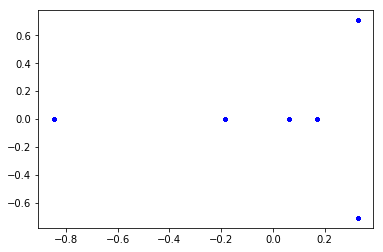

In [14]:
plt.plot(R[0,:], R[1,:], '.b')